# Spline interpolation

Using cubic splines to interpolate math functions and node sets.

***

## Setup:

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import methods

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]

***

## Assignment: interpolating $\frac{1}{x}$ on $[1; 2]$ with 6 nodes:

In [4]:
a = 1
b = 2
nodes_num = 6

def hyperbole(x):
    return 1 / x

In [5]:
xs = np.linspace(a, b, nodes_num)
ys = np.array([hyperbole(x) for x in xs])
nodes = [(x, y) for (x, y) in zip(xs, ys)]

print('Interpolation nodes:\n')
for (i, node) in enumerate(nodes):
    x = node[0]
    y = node[1]
    print(f'{i+1}) ({round(x, 4)}, {round(y, 4)})')

Interpolation nodes:

1) (1.0, 1.0)
2) (1.2, 0.8333)
3) (1.4, 0.7143)
4) (1.6, 0.625)
5) (1.8, 0.5556)
6) (2.0, 0.5)


In [6]:
spline_coeffs = methods.spline_coeffs_alpha(nodes)

# a, b, c, d coefficients for each spline
print('Splines\' a, b, c and d coefficients (alpha method):\n')
print(np.array(spline_coeffs))

spline_coeffs = methods.spline_coeffs_beta(nodes)

# a, b, c, d coefficients for each spline
print('\n\nSplines\' a, b, c and d coefficients (beta method):\n')
print(np.array(spline_coeffs))

spline_coeffs = methods.hermitian_spline_coeffs(nodes)

# a, b, c, d coefficients for each spline
print('\n\nSplines\' a, b, c and d coefficients (hermitian):\n')
print(np.array(spline_coeffs))

Splines' a, b, c and d coefficients (alpha method):

[[ 0.83333333 -0.72396901  0.8202324   1.367054  ]
 [ 0.71428571 -0.50182274  0.29049897 -0.88288904]
 [ 0.625      -0.39374003  0.24991456 -0.06764069]
 [ 0.55555556 -0.30416951  0.19793803 -0.08662755]
 [ 0.5        -0.26458191  0.         -0.32989671]]


Splines' a, b, c and d coefficients (beta method):

[[ 0.83333333 -0.72396901  0.8202324   1.367054  ]
 [ 0.71428571 -0.50182274  0.29049897 -0.88288904]
 [ 0.625      -0.39374003  0.24991456 -0.06764069]
 [ 0.55555556 -0.30416951  0.19793803 -0.08662755]
 [ 0.5        -0.26458191  0.         -0.32989671]]


Splines' a, b, c and d coefficients (hermitian):

[[ 0.83333333 -0.71428571  5.35714286 23.80952381]
 [ 0.71428571 -0.52083333  0.14880952 -1.11607143]
 [ 0.625      -0.3968254   0.12400794 -0.62003968]
 [ 0.55555556 -0.3125      0.09920635 -0.37202381]
 [ 0.5         0.          2.60416667  6.07638889]]


In [7]:
def plot_splines(xs, ys, splines, true_func=None, show_nodes=True):
    if show_nodes:
        plt.scatter(xs, ys)

    nodes_num = len(nodes)

    spline_domains = [np.linspace(xs[i], xs[i+1], 20) for i in range(nodes_num - 1)]

    for (i, (spline, domain)) in enumerate(zip(splines, spline_domains)):
        plt.plot(domain, spline(domain - xs[i+1]))

    if true_func:
        full_domain = np.linspace(xs[0], xs[-1], 20*(nodes_num - 1))
        plt.plot(full_domain, true_func(full_domain), color='black', linestyle='dashed', label='f(x)')
        plt.legend()

    plt.show()

Hermitian splines:

In [8]:
hsplines = methods.hermitian_splines(nodes)

for spline in hsplines:
    methods.latex_print(spline)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Cubic splines of defect 1:

In [9]:
splines = methods.splines_alpha(nodes)

for spline in splines:
    methods.latex_print(spline)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

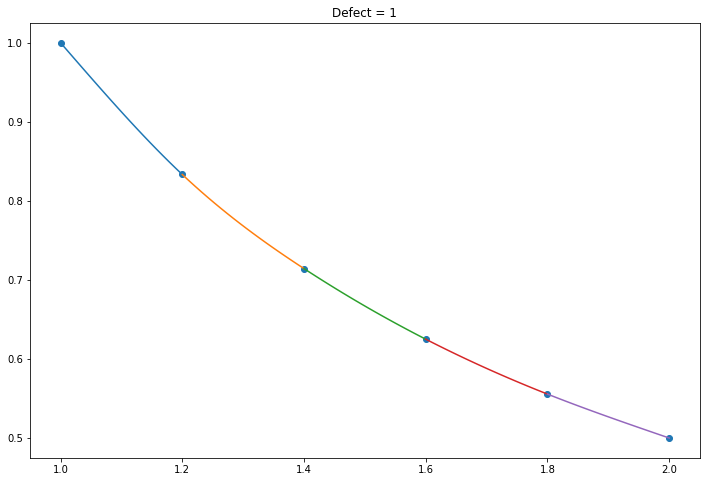

In [10]:
plt.title('Defect = 1')
plot_splines(xs, ys, splines)

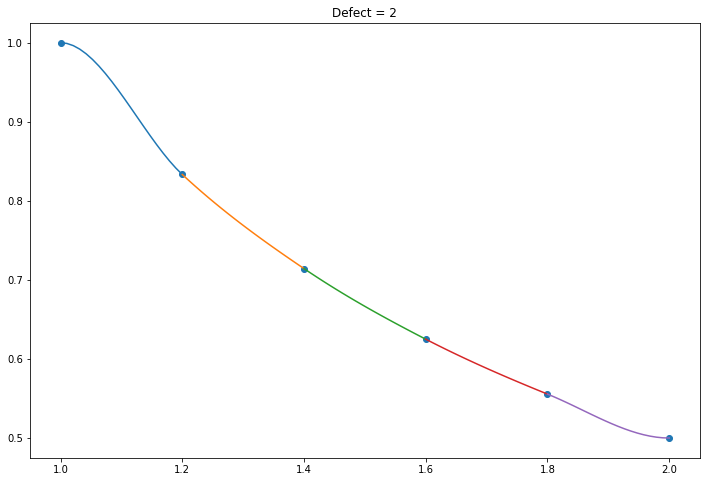

In [11]:
plt.title('Defect = 2')
plot_splines(xs, ys, hsplines)

## Plotting 1st and 2nd derivatives to show continuousity:

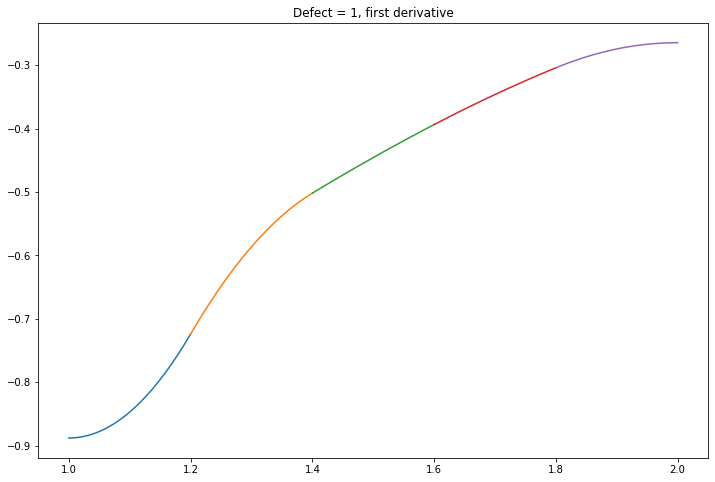

In [12]:
plt.title('Defect = 1, first derivative')
plot_splines(xs, ys, [spline.deriv() for spline in splines], show_nodes=False)

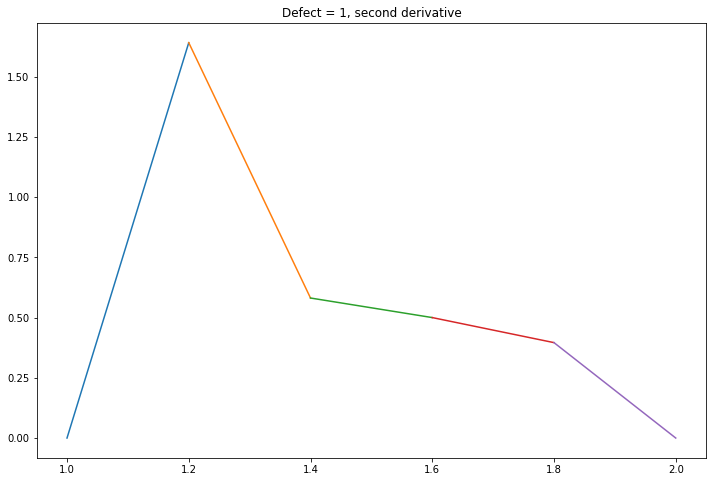

In [13]:
plt.title('Defect = 1, second derivative')
plot_splines(xs, ys, [spline.deriv(2) for spline in splines], show_nodes=False)

## Plotting hermitian splines' derivatives:

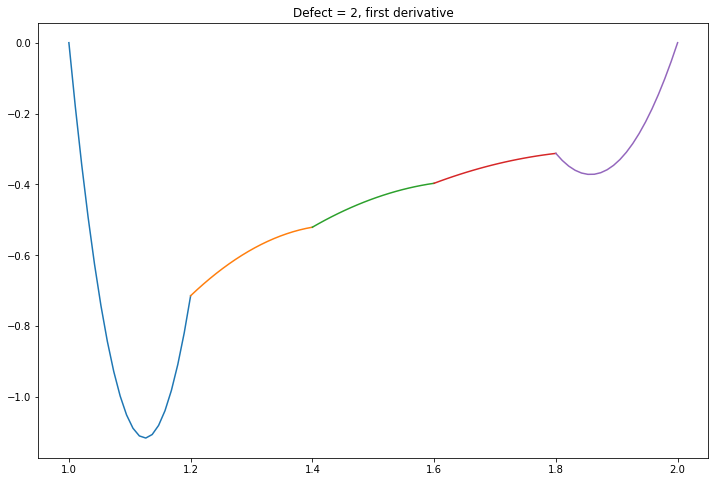

In [14]:
plt.title('Defect = 2, first derivative')
plot_splines(xs, ys, [spline.deriv() for spline in hsplines], show_nodes=False)

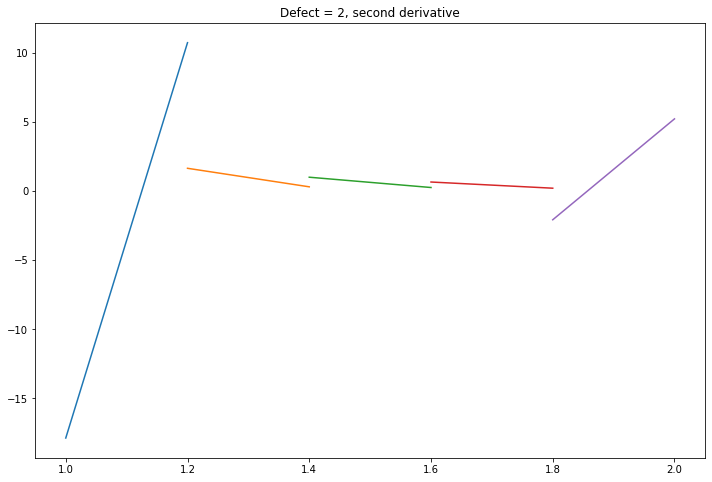

In [15]:
plt.title('Defect = 2, second derivative')
plot_splines(xs, ys, [spline.deriv(2) for spline in hsplines], show_nodes=False)

## $f(x)$ and approximations comparison:

Cubic splines of defect 1:

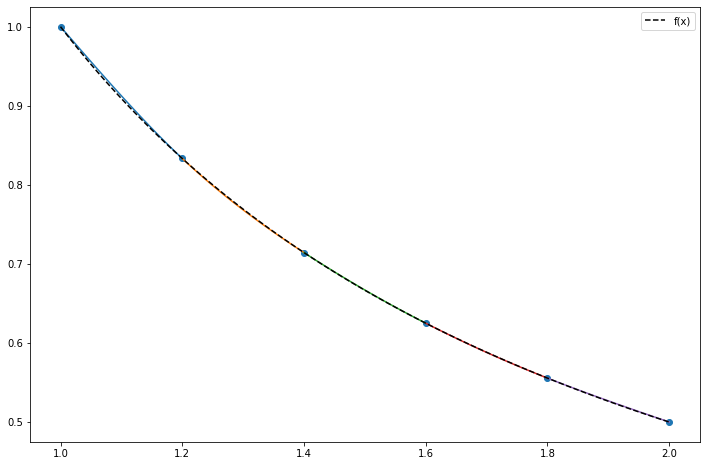

In [16]:
plot_splines(xs, ys, splines, true_func=hyperbole)

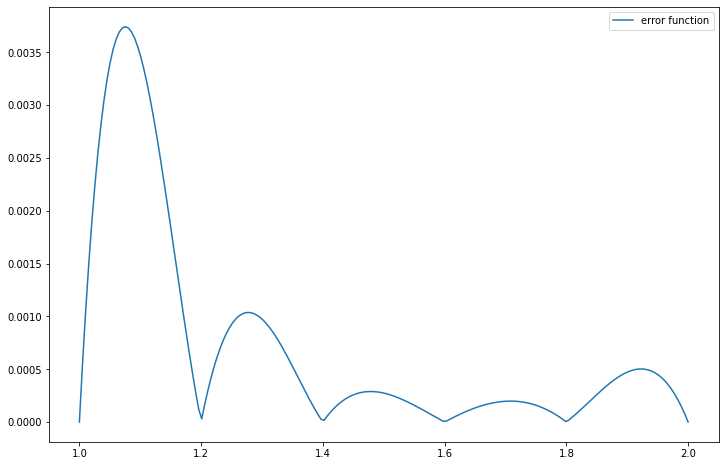

In [17]:
approx = methods.approx_beta(nodes)
domain = np.linspace(xs[0], xs[-1], 200)
plt.plot(domain, [abs(hyperbole(x) - approx(x)) for x in domain], label='error function')
plt.legend()
plt.show()

In [18]:
max_error = methods.interpolation_error(hyperbole, nodes, methods.approx_beta)
print(f'Max cubic splines of defect 1 error = {max_error}')

Max cubic splines of defect 1 error = 0.003743031958433951


---

Hermitian splines:

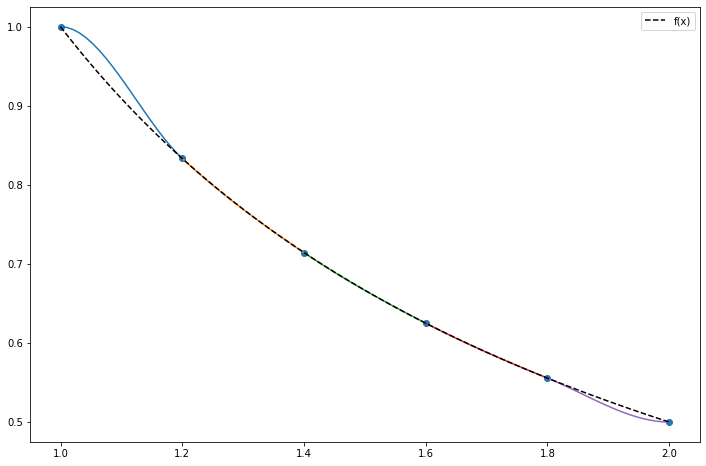

In [19]:
plot_splines(xs, ys, hsplines, true_func=hyperbole)

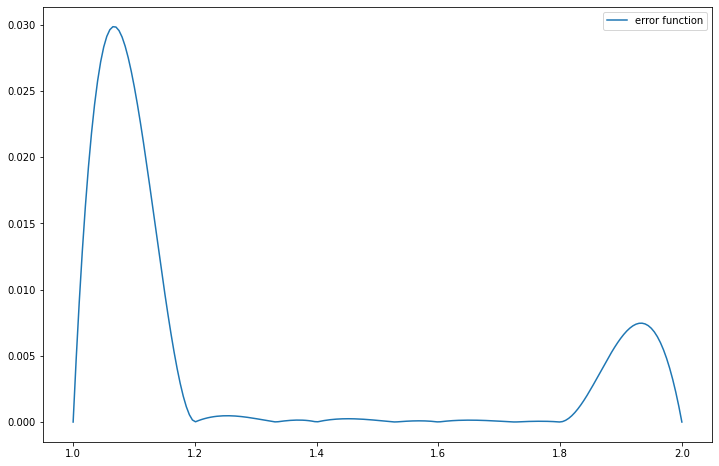

In [20]:
approx = methods.hermitian_approx(nodes)
domain = np.linspace(xs[0], xs[-1], 200)
plt.plot(domain, [abs(hyperbole(x) - approx(x)) for x in domain], label='error function')
plt.legend()
plt.show()

In [21]:
max_error = methods.interpolation_error(hyperbole, nodes, methods.hermitian_approx)
print(f'Max hermitian splines error = {max_error}')

Max hermitian splines error = 0.029873694024054043


## Evaluating interpolation in $x_0 = \frac{a+b}{2}$:

In [22]:
x0 = (a+b) / 2

y01 = hyperbole(x0)
desired_spline = splines[2]
y02 = desired_spline(x0 - xs[3])
diff = abs(y01-y02)

desired_spline = hsplines[2]
y02 = desired_spline(x0 - xs[3])
hdiff = abs(y01-y02)

print(f'x0 = (a+b) / 2 = {x0}\n')
print(f'1/x at x={x0} is {y01}')
print(f'cubic_splines_of_defect1({x0}) = {y02}')
print(f'hermitian_splines({x0}) = {y02}\n')
print(f'cubic_splines_of_defect1 error = {diff}')
print(f'hermitian_splines error = {hdiff}')

x0 = (a+b) / 2 = 1.5

1/x at x=1.5 is 0.6666666666666666
cubic_splines_of_defect1(1.5) = 0.6665426587301587
hermitian_splines(1.5) = 0.6665426587301587

cubic_splines_of_defect1 error = 0.00027412280701755165
hermitian_splines error = 0.0001240079365079083


## Max errors of splines depending on the node num (for hyperbole):

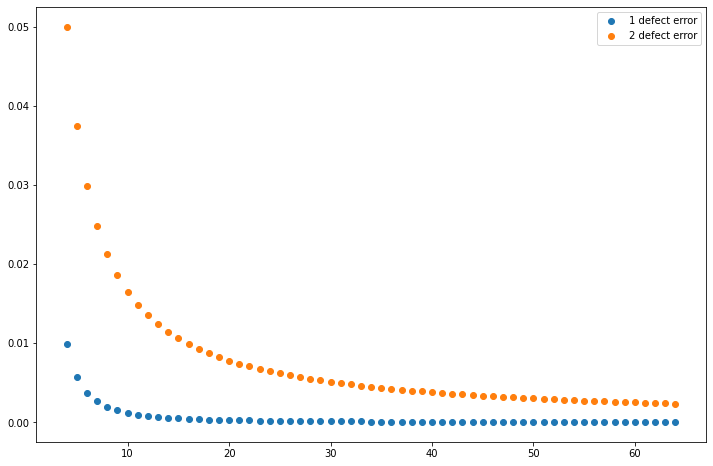

In [23]:
n1 = 4
n2 = 64

nodes_nums = [i for i in range(n1, n2+1)]
maxes = []
hmaxes = []

for nodes_num in nodes_nums:
    xs = np.linspace(a, b, nodes_num)
    ys = np.array([hyperbole(x) for x in xs])
    nodes = [(x, y) for (x, y) in zip(xs, ys)]

    maxes.append(methods.interpolation_error(hyperbole, nodes, methods.approx_beta))
    hmaxes.append(methods.interpolation_error(hyperbole, nodes, methods.hermitian_approx))

plt.scatter(nodes_nums, maxes, label='1 defect error')
plt.scatter(nodes_nums, hmaxes, label='2 defect error')

plt.legend()
plt.show()

***

## Simple demo: interpolating a random node set with differently spaced intervals:

In [24]:
nodes = [(-15, 0), (-12, 3), (-6, -1), (-5, 1), (-1, 10), (2, 4), (4, 6), (6, 8), (9, -1), (11, 6), (15, 8)]
xs = [node[0] for node in nodes]
ys = [node[1] for node in nodes]

In [25]:
spline_coeffs = methods.spline_coeffs_alpha(nodes)
print(np.array(spline_coeffs), '\n\n')

spline_coeffs = methods.spline_coeffs_beta(nodes)
print(np.array(spline_coeffs))

[[ 3.         -0.06304904 -0.53152452 -0.05905828]
 [-1.          1.3152452   0.76124023  0.07182026]
 [ 1.          2.60826936  0.53178393 -0.07648543]
 [10.         -0.59367446 -1.33226989 -0.15533782]
 [ 4.         -0.81584142  1.25821423  0.28783157]
 [ 6.          2.11525437  0.20733366 -0.17514676]
 [ 8.         -1.64517605 -2.08754887 -0.38248042]
 [-1.          0.55299871  2.82027379  0.54531363]
 [ 6.          3.75345502 -1.22004563 -0.67338657]
 [ 8.         -1.12672751  0.          0.10167047]] 


[[ 3.         -0.06304904 -0.53152452 -0.05905828]
 [-1.          1.3152452   0.76124023  0.07182026]
 [ 1.          2.60826936  0.53178393 -0.07648543]
 [10.         -0.59367446 -1.33226989 -0.15533782]
 [ 4.         -0.81584142  1.25821423  0.28783157]
 [ 6.          2.11525437  0.20733366 -0.17514676]
 [ 8.         -1.64517605 -2.08754887 -0.38248042]
 [-1.          0.55299871  2.82027379  0.54531363]
 [ 6.          3.75345502 -1.22004563 -0.67338657]
 [ 8.         -1.12672751  

In [26]:
splines = methods.splines_beta(nodes)

for spline in splines:
    methods.latex_print(spline)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

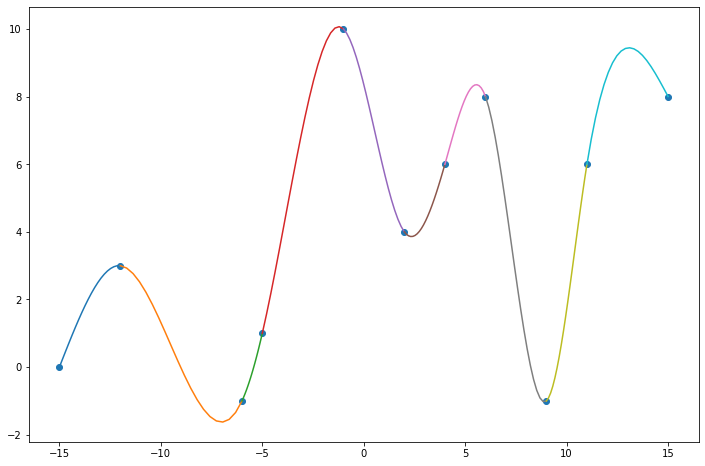

In [27]:
plot_splines(xs, ys, splines)

***

## Simple demo: building splines of defect 2:

## e.g. $e^x$ on $[-2; 2]$ with 10 nodes:

In [28]:
xs = np.linspace(-2, 2, 10)
ys = np.array([math.exp(x) for x in xs])
nodes = [(x, y) for (x, y) in zip(xs, ys)]

print('Interpolation nodes:\n')
for (i, node) in enumerate(nodes):
    x = node[0]
    y = node[1]
    print(f'{i+1}) ({round(x, 4)}, {round(y, 4)})')

Interpolation nodes:

1) (-2.0, 0.1353)
2) (-1.5556, 0.2111)
3) (-1.1111, 0.3292)
4) (-0.6667, 0.5134)
5) (-0.2222, 0.8007)
6) (0.2222, 1.2488)
7) (0.6667, 1.9477)
8) (1.1111, 3.0377)
9) (1.5556, 4.7377)
10) (2.0, 7.3891)


In [29]:
splines = methods.hermitian_splines(nodes)

for spline in splines:
    methods.latex_print(spline)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

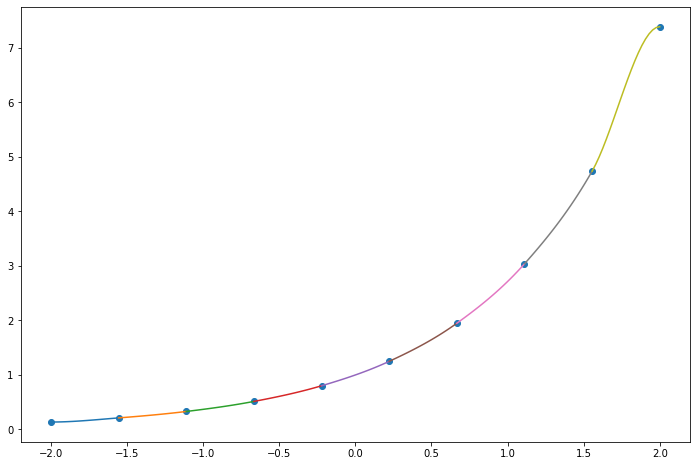

In [30]:
plot_splines(xs, ys, splines)

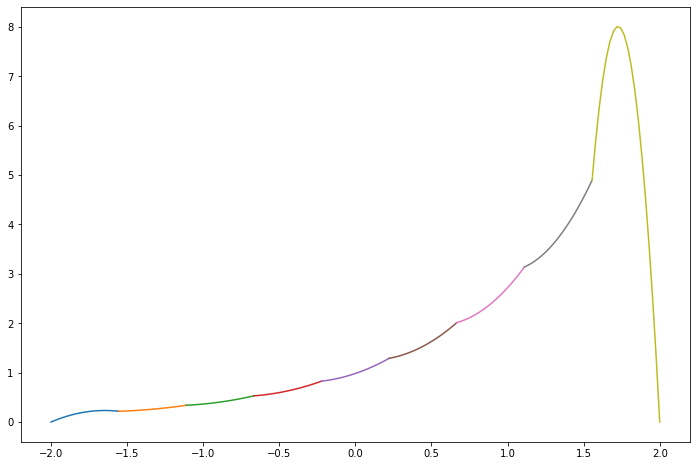

In [31]:
plot_splines(xs, ys, [spline.deriv(1) for spline in splines], show_nodes=False)

***

The biggest errors tend to occur in intervals near the ends of the domain. Hence the accuracy comparison would have more sense if the errors are compared in the inner part of the domain, excluding the intervals near the ends of it.

## A wanna-be-comprehensive interpolation accuracy comparison:

Comparing interpolation accuracy when interpolating polynomials of degree 5 and random coefficients on $[-10; 10]$

In [32]:
def random_poly(norm):
    """
    Return a polynomial of degree 5 with random coefficients.
    """
    return np.polynomial.polynomial.Polynomial([norm*(2*random.random()-1), norm*(2*random.random()-1), norm*(2*random.random()-1), norm*(2*random.random()-1), norm*(2*random.random()-1)])

In [33]:
methods.latex_print(random_poly(10))

<IPython.core.display.Math object>

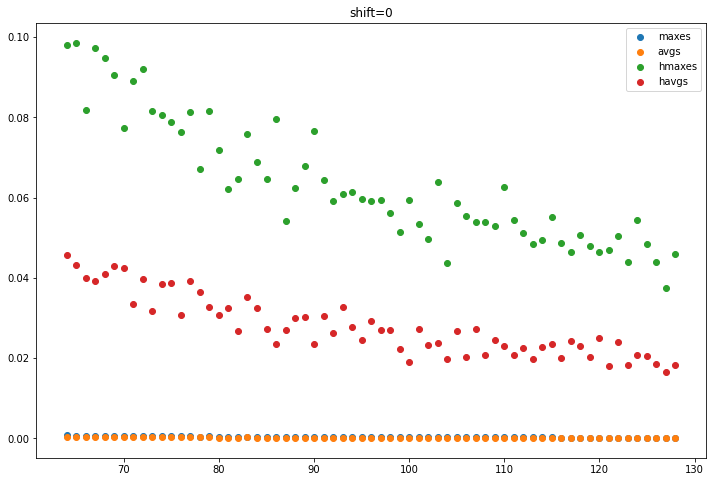

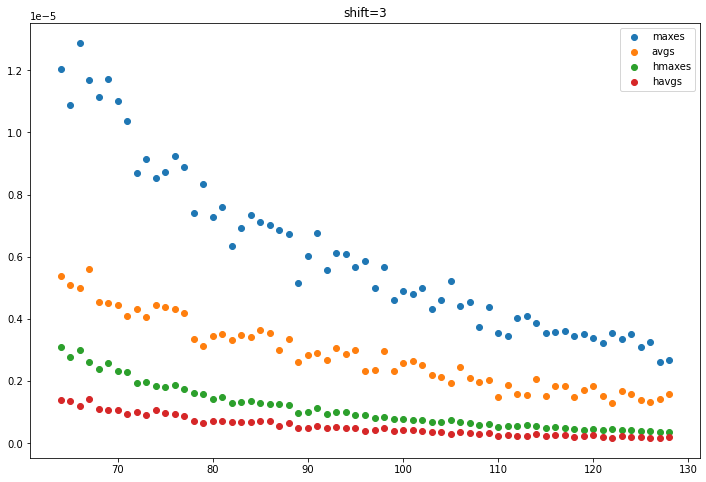

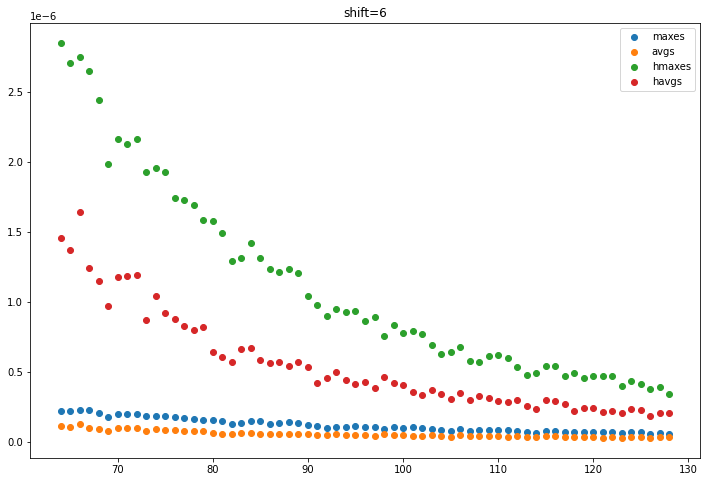

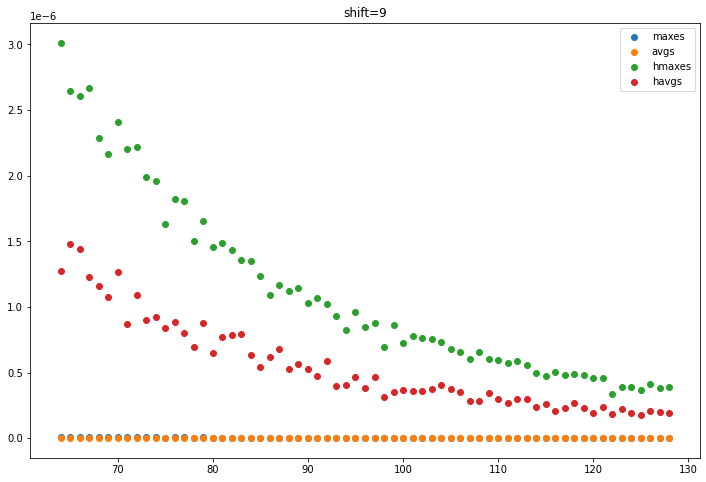

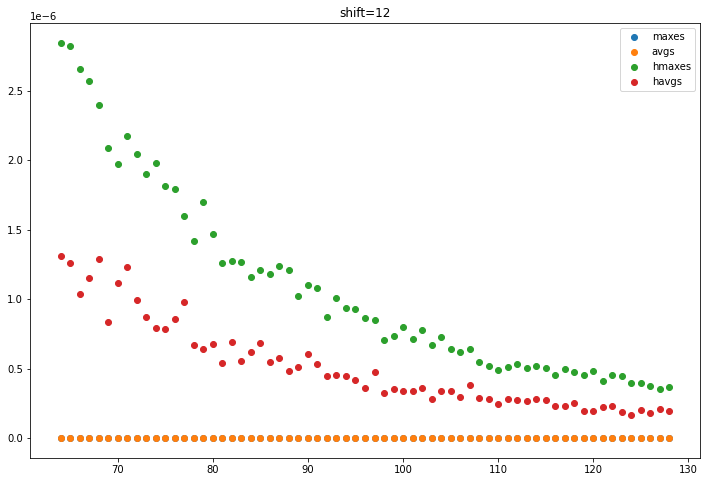

In [40]:
n1 = 64
n2 = 128
norm = 1
samples_num = 32

for shift in range(0, 12+1, 3):
    nodes_nums = [i for i in range(n1, n2+1)]
    maxes = []
    avgs = []
    hmaxes = []
    havgs = []

    for nodes_num in nodes_nums:
        errors = []
        herrors = []

        for _ in range(samples_num):
            func = random_poly(norm)

            xs = np.linspace(a, b, nodes_num)
            ys = np.array([func(x) for x in xs])
            nodes = [(x, y) for (x, y) in zip(xs, ys)]

            error = methods.interpolation_error(func, nodes, methods.approx_beta, shift)
            herror = methods.interpolation_error(func, nodes, methods.hermitian_approx, shift)

            errors.append(error)
            herrors.append(herror)

        maxes.append(max(errors))
        avgs.append(sum(errors) / samples_num)

        hmaxes.append(max(herrors))
        havgs.append(sum(herrors) / samples_num)

    plt.title(f'shift={shift}')

    plt.scatter(nodes_nums, maxes, label='maxes')
    plt.scatter(nodes_nums, avgs, label='avgs')
    plt.scatter(nodes_nums, hmaxes, label='hmaxes')
    plt.scatter(nodes_nums, havgs, label='havgs')

    plt.legend()
    plt.show()